# Logistic Regression

Importing the dataset

In [1]:
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

Encoding the target feature as factor

In [2]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

Splitting the dataset into the Training set and Test set

In [3]:
library(caTools)
set.seed(123)

Warning message:
"package 'caTools' was built under R version 3.4.3"

In [4]:
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

Feature Scaling

In [6]:
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

Fitting Logistic Regression to the Training set

In [7]:
classifier = glm(formula = Purchased ~ .,
                 family = binomial,
                 data = training_set)

 Predicting the Test set results

In [14]:
prob_pred = predict(classifier, type = 'response', newdata = test_set[-3])
prob_pred

2            4            5            9           12           18 
0.0162395375 0.0117148379 0.0037846461 0.0024527456 0.0073339436 0.2061576580 
          19           20           22           29           32           34 
0.2669935073 0.3851475689 0.5448578778 0.0103005636 0.2994922143 0.0084168787 
          35           38           45           46           48           52 
0.0494471952 0.0171641479 0.0485051303 0.0008343060 0.0102561619 0.0007055347 
          66           69           74           75           82           84 
0.0058448457 0.0044534947 0.3933468488 0.0071065671 0.1068589185 0.2580084947 
          85           86           87           89          103          104 
0.0303248927 0.3303649169 0.0051132916 0.0263861849 0.1310148056 0.7649772313 
         107          108          109          117          124          126 
0.0034367786 0.0473827096 0.0327965105 0.1626049288 0.0675494054 0.2189658514 
         127          131          134          139          148          154 
0.4142562486 0.0324337750 0.0043457839 0.0163538708 0.1030590600 0.0751093248 
         156          159          162          163          170          175 
0.0048556976 0.0027487256 0.0306647902 0.0463555716 0.0122981409 0.1169016711 
         176          193          199          200          208          213 
0.0011936610 0.0103005636 0.0252589417 0.0177353905 0.9870859806 0.9453359968 
         224          226          228          229          230          234 
0.9969454446 0.1064430571 0.9979393884 0.3705093415 0.5807527959 0.9117762840 
         236          237          239          241          255          264 
0.7817273411 0.2310672929 0.8037996043 0.9682706714 0.6686007827 0.1451169281 
         265          266          273          274          281          286 
0.9060311409 0.8293112410 0.9568520348 0.6781064291 0.9926955397 0.4170486388 
         292          299          302          305          307          310 
0.9220096987 0.7363498859 0.8247736816 0.2558136823 0.9932007105 0.1178058928 
         316          324          326          332          339          341 
0.3442845494 0.3958138650 0.3059412440 0.9725035550 0.1431602303 0.9842795480 
         343          347          353          363          364          367 
0.2073273008 0.9371909698 0.6843940060 0.5559479117 0.5698028861 0.9440512240 
         368          369          372          373          380          383 
0.8427877409 0.2549836305 0.9928717092 0.3243409327 0.8519685008 0.9697473704 
         389          392          395          400 
0.3793408625 0.2718336775 0.2040229226 0.5236436275

In [16]:
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [17]:
y_pred

2   4   5   9  12  18  19  20  22  29  32  34  35  38  45  46  48  52  66  69 
  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0 
 74  75  82  84  85  86  87  89 103 104 107 108 109 117 124 126 127 131 134 139 
  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0 
148 154 156 159 162 163 170 175 176 193 199 200 208 213 224 226 228 229 230 234 
  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   0   1   0   1   1 
236 237 239 241 255 264 265 266 273 274 281 286 292 299 302 305 307 310 316 324 
  1   0   1   1   1   0   1   1   1   1   1   0   1   1   1   0   1   0   0   0 
326 332 339 341 343 347 353 363 364 367 368 369 372 373 380 383 389 392 395 400 
  0   1   0   1   0   1   1   1   1   1   1   0   1   0   1   1   0   0   0   1

Making the Confusion Matrix

In [18]:
cm = table(test_set[, 3], y_pred > 0.5)
cm

   
    FALSE TRUE
  0    57    7
  1    10   26

Visualising the Training set results

Warning message:
"package 'ElemStatLearn' was built under R version 3.4.3"

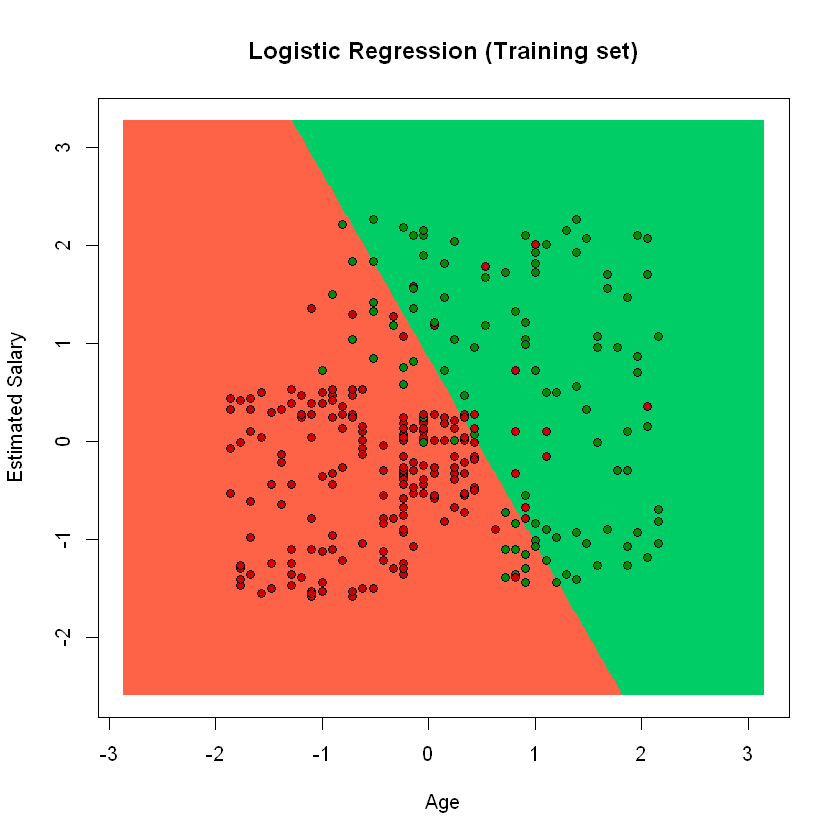

In [11]:
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

Visualising the Test set results

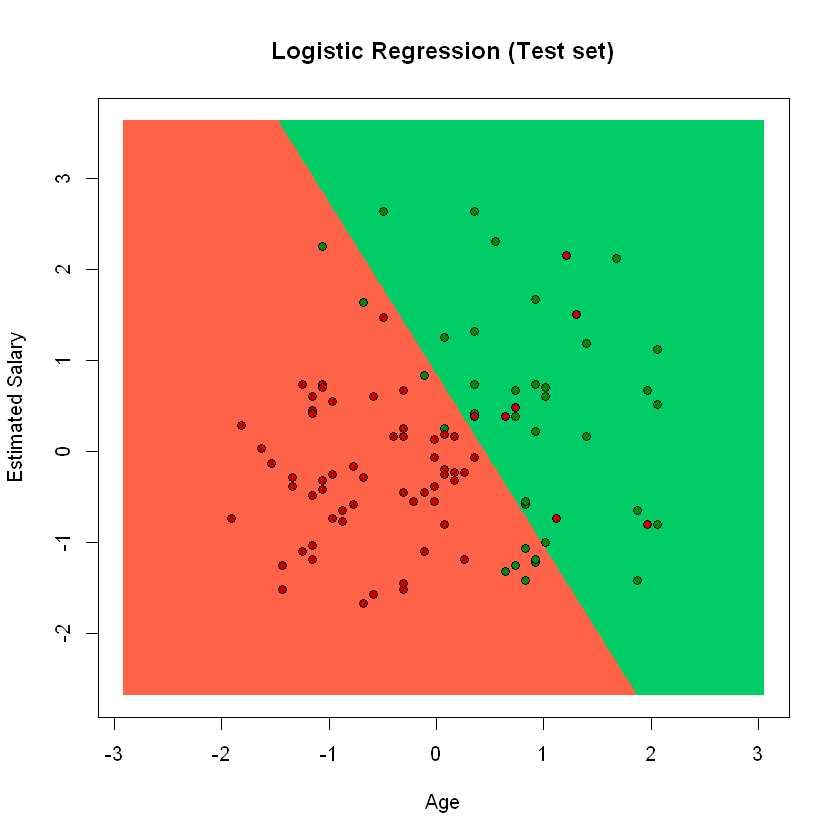

In [12]:
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))